/tmp/ipykernel_573211/970945123.py:11: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="conf")


input:
  props:
    channel: H3342
    mode: raw
  transforms: []
  num_channels: 1
outputs:
  B:
    props:
      channel: Cy3
      mode: raw
    transforms: []
    num_channels: 1
  C:
    props:
      channel: Cy5
      mode: raw
    transforms: []
    num_channels: 1

Reusing existing split...
48800 samples were split into train=43920, val=0, test=4880.


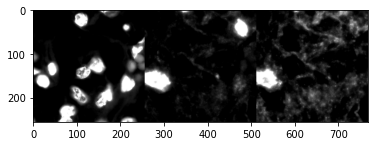

In [3]:
from hydra import initialize, compose
from hydra.core.global_hydra import GlobalHydra
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import numpy as np

from hoechstgan.data import create_dataset
from hoechstgan.util import tensor2im

GlobalHydra().clear()
initialize(config_path="conf")
cfg = compose("config.yaml", overrides=["+experiment=dual_cy3_cy5"])#["name=test", "dataset.output.transforms=[gaussian_blur]"])

print(OmegaConf.to_yaml({"input": cfg.dataset.input, "outputs": cfg.dataset.outputs}))

dataset = create_dataset(cfg)

item = next(iter(dataset))
imgs = np.concatenate([tensor2im(item[x]) for x in "ABC"], axis=1)
plt.imshow(imgs, cmap="gray")